<a href="https://colab.research.google.com/github/aginjithgj/IndianMoney/blob/main/Label_Encoding_in_Python_AI_data_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Categorical encoding using Label-Encoding and One-Hot-Encoder
In many Machine-learning or Data Science activities, the data set might contain text or categorical values (basically non-numerical values). For example, color feature having values like red, orange, blue, white etc. Meal plan having values like breakfast, lunch, snacks, dinner, tea etc. Few algorithms such as CATBOAST, decision-trees can handle categorical values very well but most of the algorithms expect numerical values to achieve state-of-the-art results.

Over your learning curve in AI and Machine Learning, one thing you would notice that most of the algorithms work better with numerical inputs. Therefore, the main challenge faced by an analyst is to convert text/categorical data into numerical data and still make an algorithm/model to make sense out of it. Neural networks, which is a base of deep-learning, expects input values to be numerical.

There are many ways to convert categorical values into numerical values. Each approach has its own trade-offs and impact on the feature set. Hereby, I would focus on 2 main methods: One-Hot-Encoding and Label-Encoder. Both of these encoders are part of SciKit-learn library (one of the most widely used Python library) and are used to convert text or categorical data into numerical data which the model expects and perform better with.

Code snippets in this article would be of Python since I am more comfortable with Python. If you need for R (another widely used Machine-Learning language) then say so in comments.

Label Encoding
This approach is very simple and it involves converting each value in a column to a number. Consider a dataset of bridges having a column names bridge-types having below values. Though there will be many more columns in the dataset, to understand label-encoding, we will focus on one categorical column only

###BRIDGE-TYPE:
- Arch
- Beam
-Truss
-Cantilever
-Tied Arch
-Suspension
-Cable

We choose to encode the text values by putting a running sequence for each text values like below:

###BRIDGE-TYPE:
- Arch = 0
- Beam  = 1
- Truss = 2
- Cantilever = 3
- Tied Arch = 4
- Suspension = 5
- Cable = 6

With this, we completed the label-encoding of variable bridge-type. That’s all label encoding is about. But depending upon the data values and type of data, label encoding induces a new problem since it uses number sequencing. The problem using the number is that they introduce relation/comparison between them. Apparently, there is no relation between various bridge type, but when looking at the number, one might think that ‘Cable’ bridge type has higher precedence over ‘Arch’ bridge type. The algorithm might misunderstand that data has some kind of hierarchy/order 0 < 1 < 2 … < 6 and might give 6X more weight to ‘Cable’ in calculation then than ‘Arch’ bridge type.

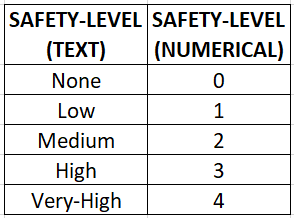


Let’s consider another column named ‘Safety Level’. Performing label encoding of this column also induces order/precedence in number, but in the right way. Here the numerical order does not look out-of-box and it makes sense if the algorithm interprets safety order 0 < 1 < 2 < 3 < 4 i.e. none < low < medium < high < very high.


##Label Encoding in Python
Using category codes approach:

This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ type. So you might have to change type to ‘category’ before using this approach.



Imprting requried liberis 

In [2]:
import pandas as pd
import numpy as np

##Creating initial data frame


In [3]:
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_types

('Arch', 'Beam', 'Truss', 'Cantilever', 'Tied Arch', 'Suspension', 'Cable')

Adding it to table

In [4]:
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
bridge_df

,Bridge_Types
0,Arch
1,Beam
2,Truss
3,Cantilever
4,Tied Arch
5,Suspension
6,Cable


Converting type colome to catogory

In [5]:
bridge_df['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')
bridge_df

,Bridge_Types
0,Arch
1,Beam
2,Truss
3,Cantilever
4,Tied Arch
5,Suspension
6,Cable


MyNote: Assigning numarical value and assigen it in other colume

###Using category codes approach:

This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ type. So you might have to change type to ‘category’ before using this approach.
```
# import required libraries
import pandas as pd
import numpy as np
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# converting type of columns to 'category'
bridge_df['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = bridge_df['Bridge_Types'].cat.codes
bridge_df

```

In [6]:
bridge_df['Bridge_Types_Cat'] = bridge_df['Bridge_Types'].cat.codes
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


###Using sci-kit learn library approach:
Another common approach which many data analyst perform label-encoding is by using SciKit learn library.

```
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df```


In [7]:
from sklearn.preprocessing import LabelEncoder



Creating instence for LaborEncoder

In [8]:
labelencoder = LabelEncoder()

Geting the table

In [9]:
bridge_df2 = pd.DataFrame(bridge_types, columns=['Bridge_Types'])


Changing the catogroy

In [10]:
bridge_df2['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')

In [11]:
bridge_df2['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df2

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


Above methord disadvantage: the numerical value can have a miss understanding of  some hierachy/order in them.

#One-Hot Encodr

Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. Let’s consider the previous example of bridge type and safety levels with one-hot encoding

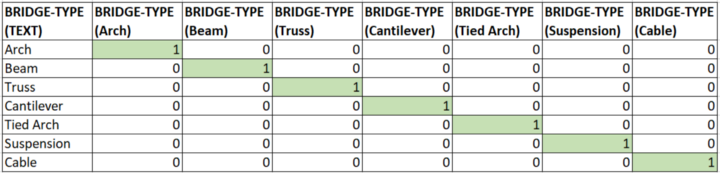

Above are the one-hot encoded values of categorical column ‘Bridge-Type’. In the same way, let's check for ‘Safety-Level’ column.

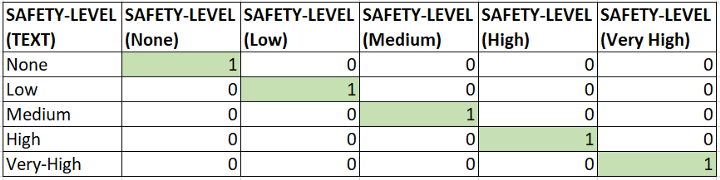

Rows which have the first column value (Arch/None) will have ‘1’ (indicating true) and other value’s columns will have ‘0’ (indicating false). Similarly, for other rows matching value with column value.

Though this approach eliminates the hierarchy/order issues but does have the downside of adding more columns to the data set. It can cause the number of columns to expand greatly if you have many unique values in a category column. In the above example, it was manageable, but it will get really challenging to manage when encoding gives many columns.

##One-Hot Encoding in Python
Using sci-kit learn library approach:

OneHotEncoder from SciKit library only takes numerical categorical values, hence any value of string type should be label encoded before one hot encoded. So taking the dataframe from the previous example, we will apply OneHotEncoder on column Bridge_Types_Cat.

```
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())
# merge with main df bridge_df on key values
bridge_df = bridge_df.join(enc_df)
bridge_df 
```

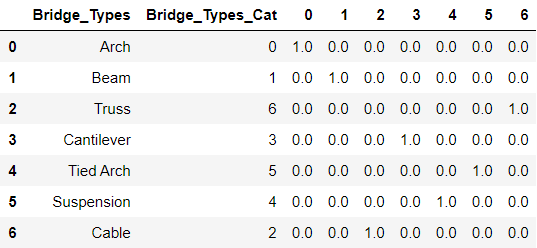

Columns ‘Bridge_Types_Cat’ can be dropped from the dataframe.

###Using dummies values approach:

This approach is more flexible because it allows encoding as many category columns as you would like and choose how to label the columns using a prefix. Proper naming will make the rest of the analysis just a little bit easier.
```

import pandas as pd
import numpy as np
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# generate binary values using get_dummies
dum_df = pd.get_dummies(bridge_df, columns=["Bridge_Types"], prefix=["Type_is"] )
# merge with main df bridge_df on key values
bridge_df = bridge_df.join(dum_df)
bridge_df

```
see the table a the end



In [15]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown = 'ignore')

#passing bridge-type-cat column (label encoded values of bridge_types)

enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())

#merge with main df bride_df on key values
bridge_df = bridge_df.join(enc_df)


In [16]:
bridge_df

,Bridge_Types,Bridge_Types_Cat,0,1,2,3,4,5,6
0,Arch,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Beam,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Truss,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Cantilever,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Tied Arch,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Suspension,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Cable,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
enc_df

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#Using dummies values approach:

In [22]:
#crrating intial dataframe
bridge_df3 = pd.DataFrame(bridge_types,columns = ['Bridge_Types'])
bridge_df3

,Bridge_Types
0,Arch
1,Beam
2,Truss
3,Cantilever
4,Tied Arch
5,Suspension
6,Cable


###generate binary values usin get_dummies

In [30]:
dum_df = pd.get_dummies (bridge_df3, columns= ["Bridge_Types"],prefix=["Type_is"])
dum_df

,Type_is_Arch,Type_is_Beam,Type_is_Cable,Type_is_Cantilever,Type_is_Suspension,Type_is_Tied Arch,Type_is_Truss
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0
5,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0


merge with main df bridge_df on key values

In [31]:
bridge_df4 = bridge_df3.join(dum_df)
bridge_df4

,Bridge_Types,Type_is_Arch,Type_is_Beam,Type_is_Cable,Type_is_Cantilever,Type_is_Suspension,Type_is_Tied Arch,Type_is_Truss
0,Arch,1,0,0,0,0,0,0
1,Beam,0,1,0,0,0,0,0
2,Truss,0,0,0,0,0,0,1
3,Cantilever,0,0,0,1,0,0,0
4,Tied Arch,0,0,0,0,0,1,0
5,Suspension,0,0,0,0,1,0,0
6,Cable,0,0,1,0,0,0,0


###Conclusion
It is important to understand various option for encoding categorical variables because each approach has its own pros and cons. In data science, it is an important step, so I really encourage you to keep these ideas in mind when dealing with categorical variables. For any suggestion or for more details on the code used in this article, feel free to comment.